### Dataset Description
- num_passengers = number of passengers travelling
- sales_channel = sales channel booking was made on
- trip_type = trip Type (Round Trip, One Way, Circle Trip)
- purchase_lead = number of days between travel date and booking date
- length_of_stay = number of days spent at destination
- flight_hour = hour of flight departure
- flight_day = day of week of flight departure
- route = origin -> destination flight route
- booking_origin = country from where booking was made
- wants_extra_baggage = if the customer wanted extra baggage in the booking
- wants_preferred_seat = if the customer wanted a preferred seat in the booking
- wants_in_flight_meals = if the customer wanted in-flight meals in the booking
- flight_duration = total duration of flight (in hours)
- booking_complete = flag indicating if the customer completed the booking

https://www.kaggle.com/code/jnikhilsai/cross-validation-with-linear-regression/comments

In [1]:
# function to compute different metrics to check performance of a regression model
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check regression model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred_proba = model.predict_proba(predictors)[:, 1]
    # convert the probability to class
    pred_class = np.round(pred_proba > threshold)
    acc = accuracy_score(target, pred_class)  # to compute acuracy
    recall = recall_score(target, pred_class, average = "weighted")  # to compute recall
    precision = precision_score(target, pred_class, average="weighted")  # to compute precision
    f1 = f1_score(target, pred_class, average="weighted")  # to compute F1 score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1
        },
        index=[0])
    conf = confusion_matrix(target, pred_class)
    plt.figure(figsize=(8, 5))
    sb.heatmap(conf, annot=True, fmt="g")
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.show()
 
    return df_perf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
precision_score,
accuracy_score,
recall_score,
f1_score, confusion_matrix)
import warnings 
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
df.shape

(50000, 14)

In [6]:
df.duplicated().sum()

719

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [9]:
for column in df.columns:
    print(f'{column}: {df[column].unique()}')

num_passengers: [2 1 3 4 6 5 7 9 8]
sales_channel: ['Internet' 'Mobile']
trip_type: ['RoundTrip' 'CircleTrip' 'OneWay']
purchase_lead: [262 112 243  96  68   3 201 238  80 378 185   8 265 245 192 259  19  67
 351 228  21  23  25  16  66  51  37 101   7   5  33  20  56  13  71 346
   9  65 221 107  14  77  24  47  22  11  35 272 250 161 128 190 311  27
 314 102   2  26  32  57 198 120  69 281 282  15  31 316 232 156 196 283
  34  63   6 227 181 138 134  85  93 118  90 168 127  18 153 186 263 172
 230  42  81 140 285 179 341 173 180 366 229 174  82  75 163 105 276 110
  83 154  55  45  54 193  10 166  97 239 182  99  53  28 384  70 126 142
  87  86 313  41  91 206 197 268 157 145 241 139  59 396 280  79 380 132
 121 419  58 115 236 225 116 191 275 417 159  92 106 218 295  12 305 235
 332 125 204 310 368 169 214 155 325 130 189 226 122  88 211 188 129 149
  38 194 183  40  95 135 222  64 162 150  73 133  89 151 349  29 123 298
 195  84 410 216 111 109   0 210 326 240  39 294 304 160 363 2

In [10]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [11]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [12]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,49281.0,1.590187,1.016538,1.00,1.00,1.00,2.00,9.0
purchase_lead,49281.0,84.723281,90.410229,0.00,21.00,51.00,115.00,867.0
length_of_stay,49281.0,23.053976,33.832149,0.00,5.00,17.00,28.00,778.0
flight_hour,49281.0,9.070676,5.413099,0.00,5.00,9.00,13.00,23.0
flight_day,49281.0,3.813620,1.991913,1.00,2.00,4.00,5.00,7.0
wants_extra_baggage,49281.0,0.668229,0.470854,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,49281.0,0.295631,0.456331,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,49281.0,0.426635,0.494593,0.00,0.00,0.00,1.00,1.0
flight_duration,49281.0,7.279974,1.496390,4.67,5.62,7.57,8.83,9.5
booking_complete,49281.0,0.149977,0.357052,0.00,0.00,0.00,0.00,1.0


#### Exploratory Data Analysis

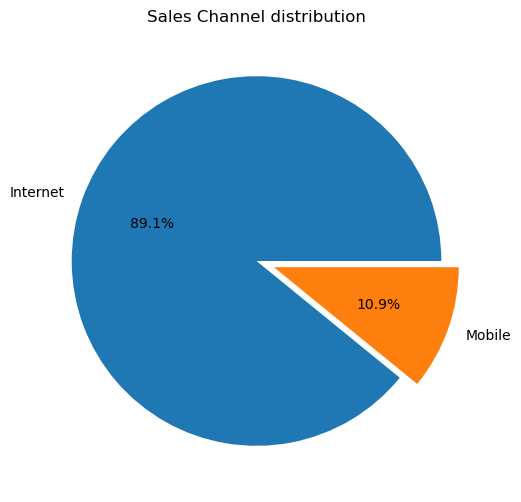

In [14]:
sales_channel_counts = df['sales_channel'].value_counts()
labels = sales_channel_counts.index
plt.figure(figsize=(6,6))
explode=[0,0.1]
plt.pie(df['sales_channel'].value_counts(), labels=labels,autopct='%1.1f%%', explode=explode)
plt.title('Sales Channel distribution')
plt.show()

<Axes: xlabel='trip_type'>

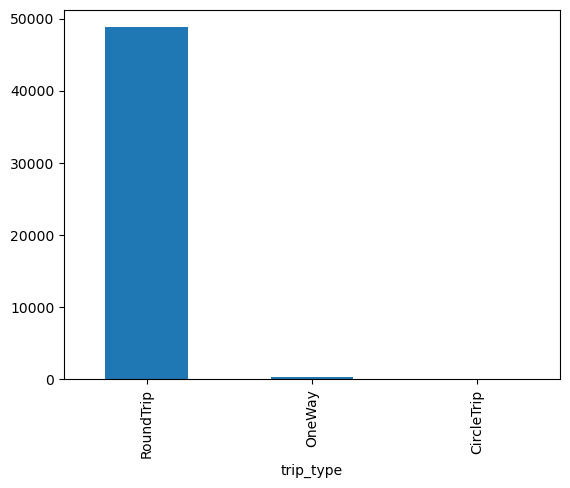

In [15]:
df['trip_type'].value_counts().plot(kind='bar')

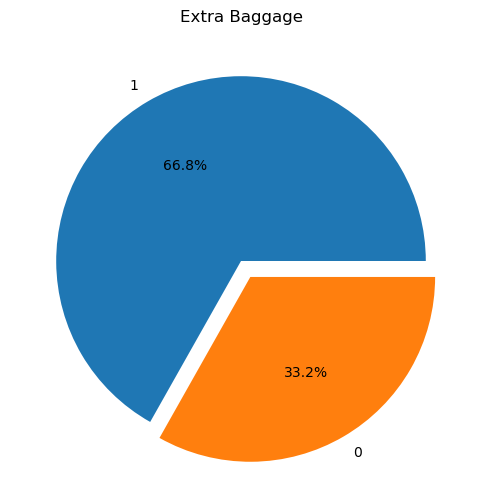

In [16]:
wants_extra_baggage_counts = df['wants_extra_baggage'].value_counts()
labels = wants_extra_baggage_counts.index
plt.figure(figsize=(6,6))
explode=[0,0.1]
plt.pie(df['wants_extra_baggage'].value_counts(), labels=labels,autopct='%1.1f%%', explode=explode)
plt.title('Extra Baggage')
plt.show()

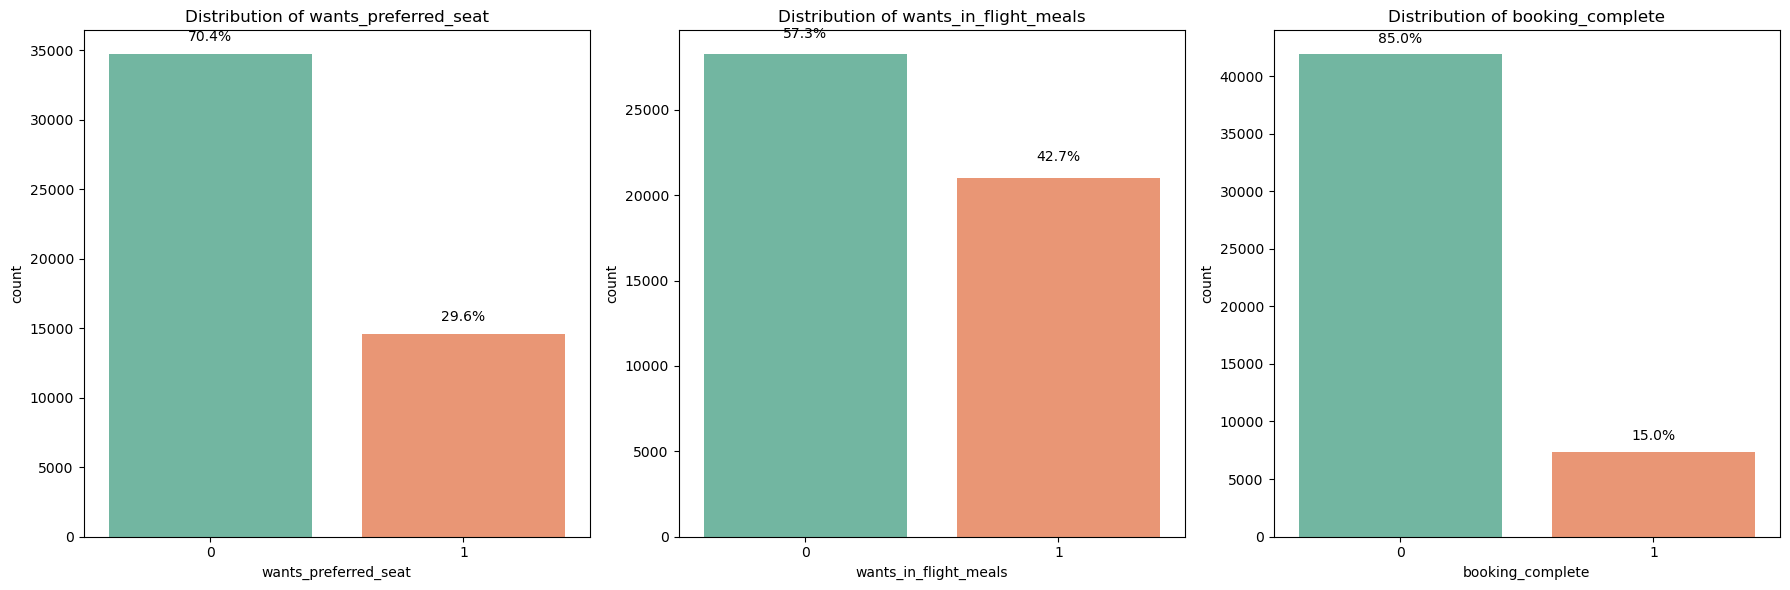

In [17]:
binary_preferences = [ 'wants_preferred_seat', 'wants_in_flight_meals', 'booking_complete']

# Set up a grid for subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Loop through each binary preference variable
for i, pref_var in enumerate(binary_preferences):
    # Plot countplot
    sb.countplot(x=pref_var, data=df, ax=axes[i], palette="Set2")
    axes[i].set_title(f'Distribution of {pref_var}')

    # Add percentage text on top of each bar
    total = len(df[pref_var])
    for p in axes[i].patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() + 0.02 * total
        axes[i].annotate(percentage, (x, y), ha='center')

# Adjust layout
plt.tight_layout()
plt.show()

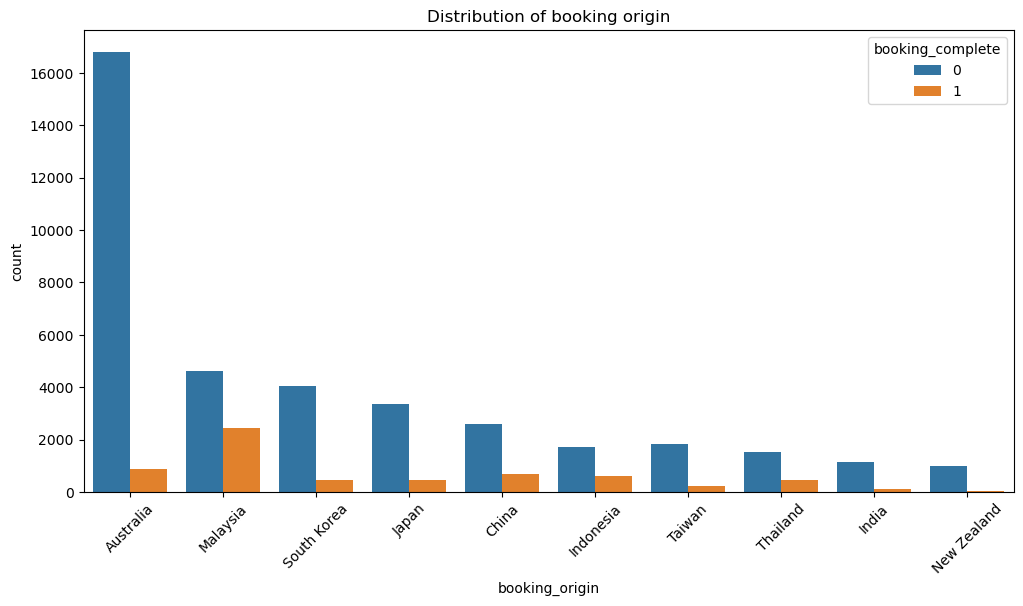

In [18]:
plt.figure(figsize=(12, 6))
sb.countplot(x='booking_origin', data=df, order=df['booking_origin'].value_counts().nlargest(10).index, hue='booking_complete')
plt.title('Distribution of booking origin')
plt.xticks(rotation=45)
plt.show()

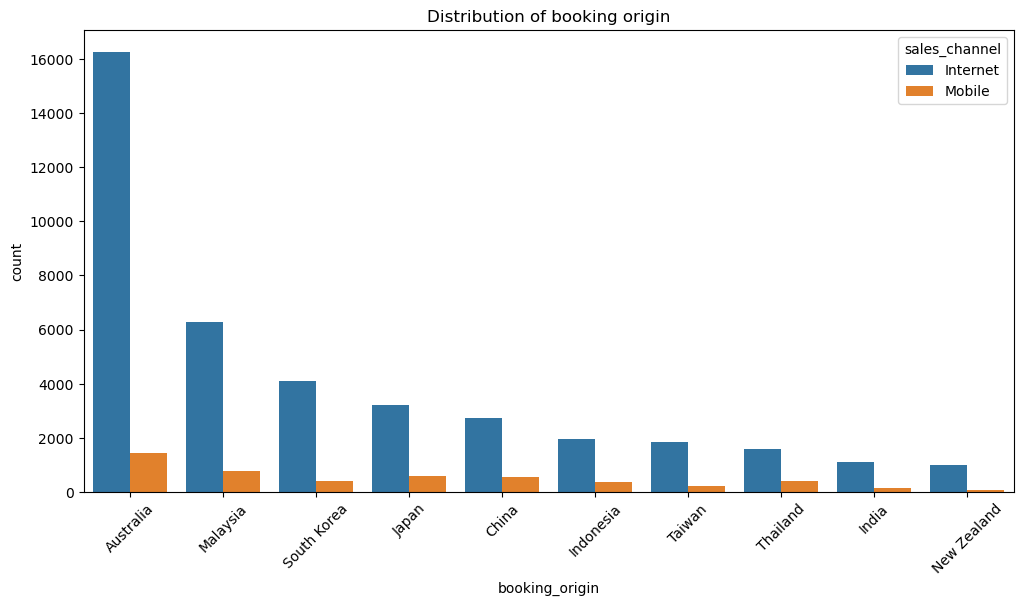

In [19]:
plt.figure(figsize=(12, 6))
sb.countplot(x='booking_origin', data=df, order=df['booking_origin'].value_counts().nlargest(10).index, hue='sales_channel')
plt.title('Distribution of booking origin')
plt.xticks(rotation=45)
plt.show()

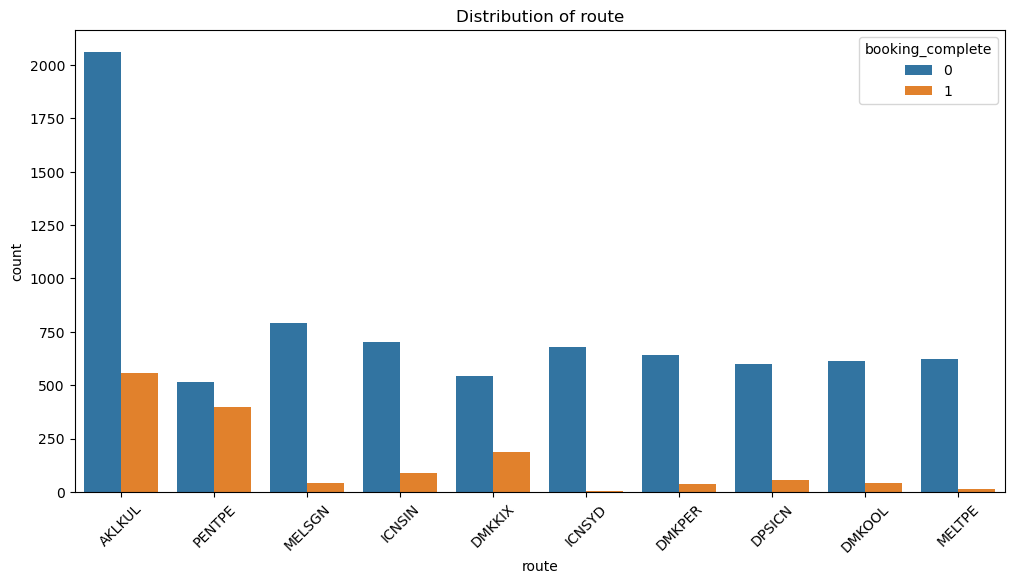

In [20]:
plt.figure(figsize=(12, 6))
sb.countplot(x='route', data=df, order=df['route'].value_counts().nlargest(10).index, hue='booking_complete')
plt.title('Distribution of route')
plt.xticks(rotation=45)
plt.show()

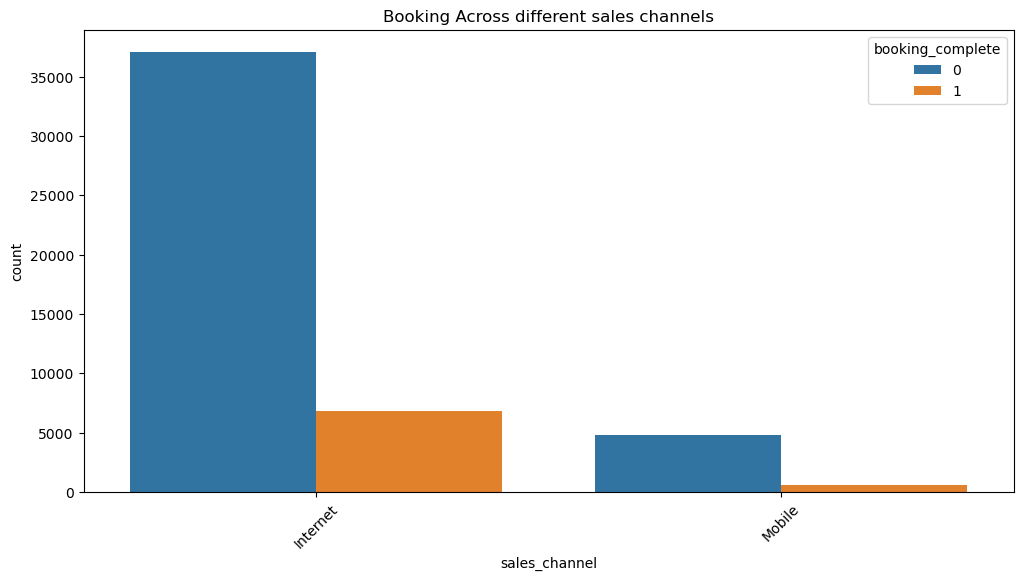

In [21]:
plt.figure(figsize=(12, 6))
sb.countplot(x='sales_channel', hue='booking_complete',  data=df)
plt.title('Booking Across different sales channels')
plt.xticks(rotation=45)
plt.show()

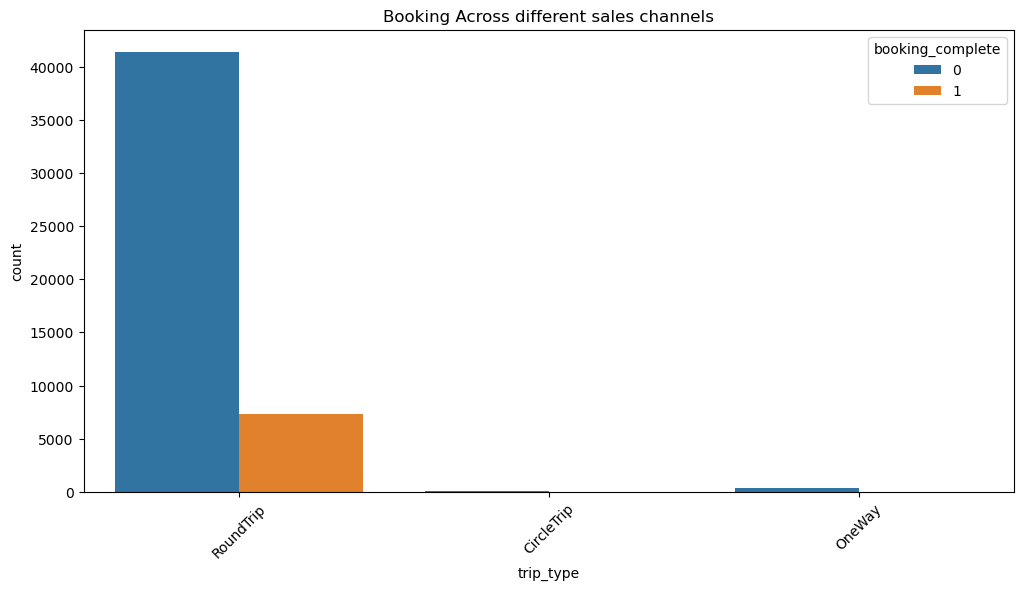

In [22]:
plt.figure(figsize=(12, 6))
sb.countplot(x='trip_type', hue='booking_complete',  data=df)
plt.title('Booking Across different sales channels')
plt.xticks(rotation=45)
plt.show()

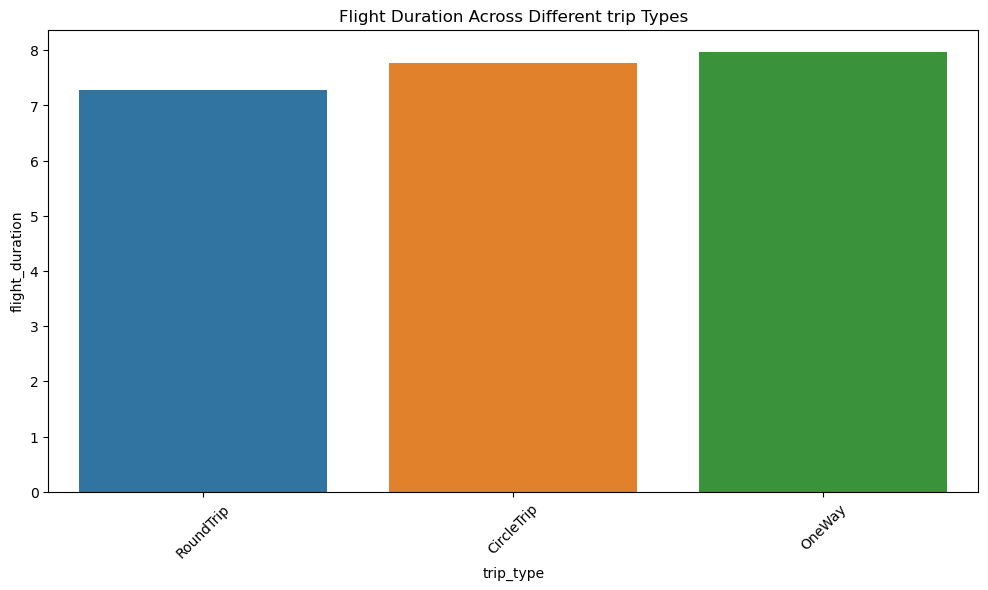

In [23]:
plt.figure(figsize=(12, 6))
sb.barplot(x='trip_type', y='flight_duration',  data=df, ci=None)
plt.title('Flight Duration Across Different trip Types')
plt.xticks(rotation=45)
plt.show()

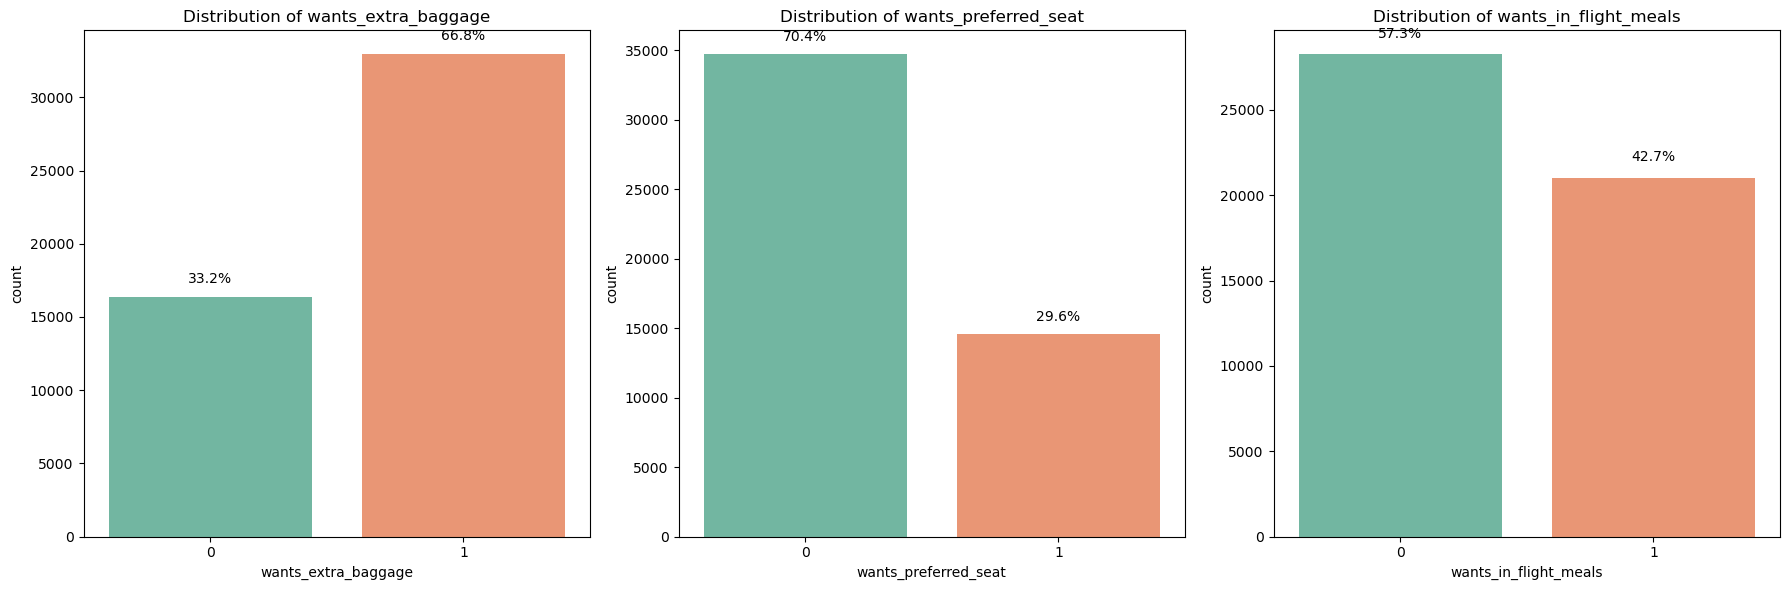

In [24]:
# Define the list of binary preference variables
binary_preferences = ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']

# Set up a grid for subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Loop through each binary preference variable
for i, pref_var in enumerate(binary_preferences):
    # Plot countplot
    sb.countplot(x=pref_var, data=df, ax=axes[i], palette="Set2")
    axes[i].set_title(f'Distribution of {pref_var}')

    # Add percentage text on top of each bar
    total = len(df[pref_var])
    for p in axes[i].patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() + 0.02 * total
        axes[i].annotate(percentage, (x, y), ha='center')

# Adjust layout
plt.tight_layout()
plt.show()

<Axes: xlabel='trip_type', ylabel='length_of_stay'>

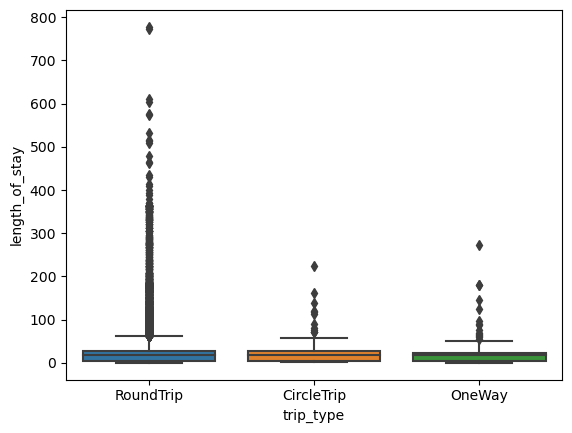

In [25]:
sb.boxplot(x='trip_type', y='length_of_stay', data=df)

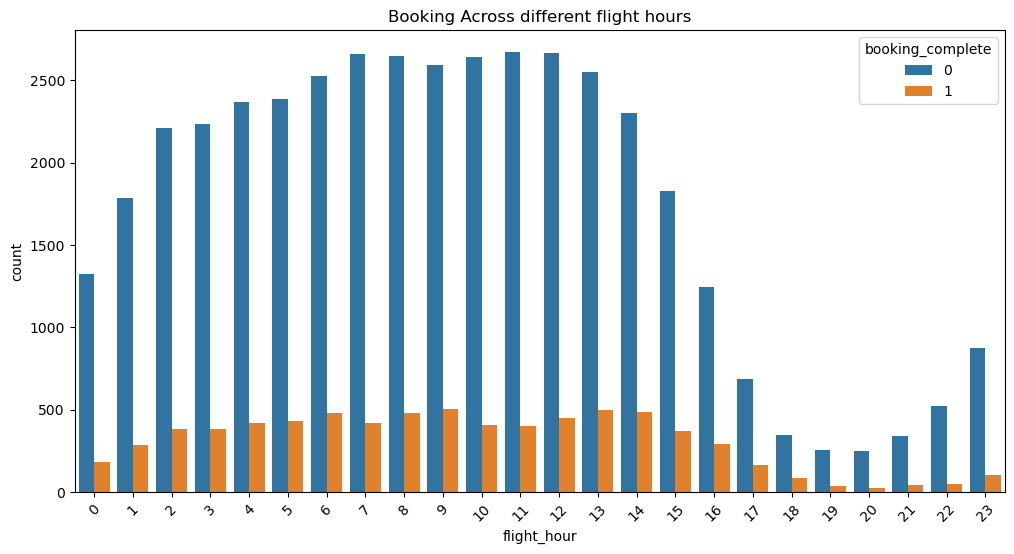

In [26]:
plt.figure(figsize=(12, 6))
sb.countplot(x='flight_hour', hue='booking_complete',  data=df)
plt.title('Booking Across different flight hours')
plt.xticks(rotation=45)
plt.show()

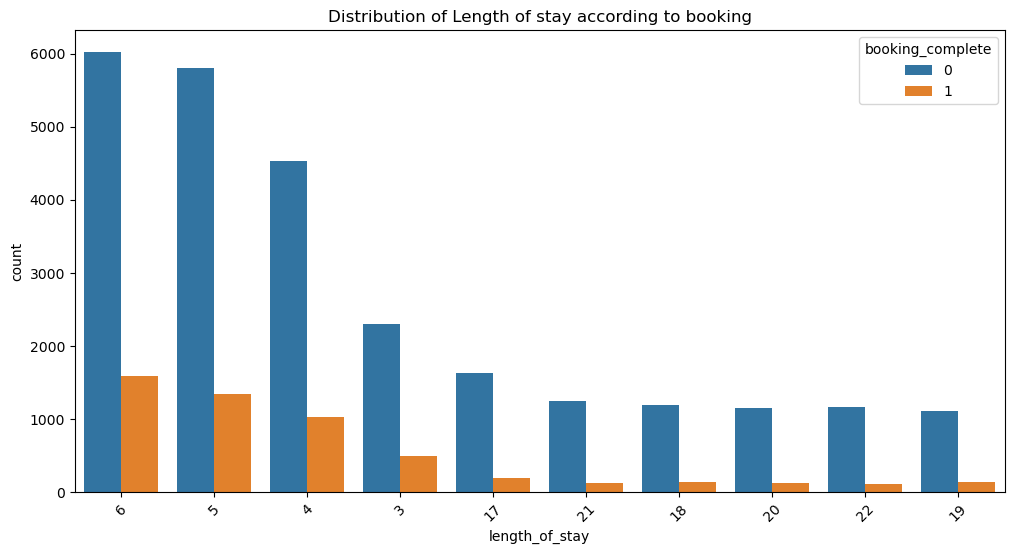

In [27]:
plt.figure(figsize=(12, 6))
sb.countplot(x='length_of_stay', data=df, order=df['length_of_stay'].value_counts().nlargest(10).index, hue='booking_complete')
plt.title('Distribution of Length of stay according to booking')
plt.xticks(rotation=45)
plt.show()

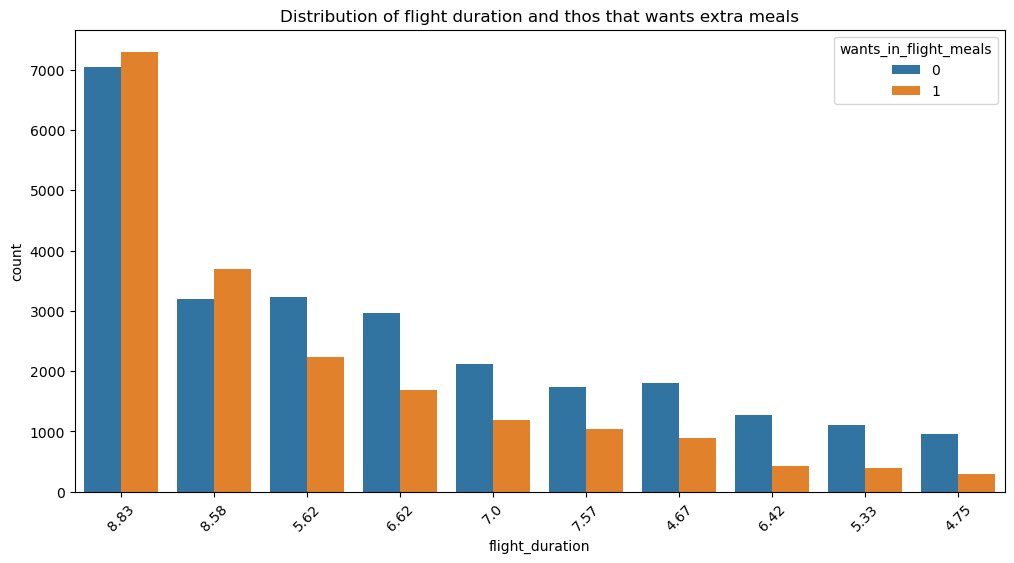

In [28]:
plt.figure(figsize=(12, 6))
sb.countplot(x='flight_duration', data=df, order=df['flight_duration'].value_counts().nlargest(10).index, hue='wants_in_flight_meals')
plt.title('Distribution of flight duration and thos that wants extra meals')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Daily flights Across Different Length of stay')

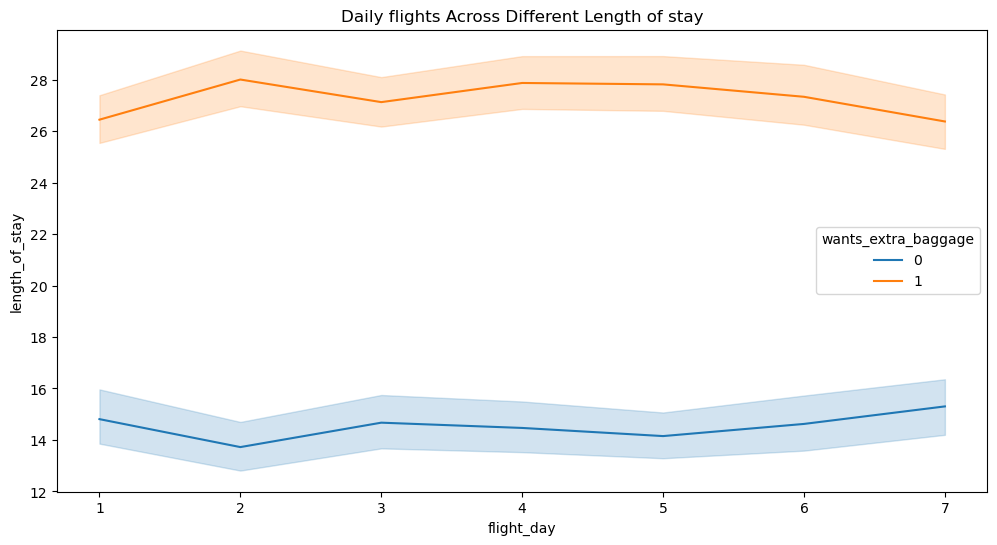

In [29]:
#Plot of daily actual quantity across each machine
plt.figure(figsize=(12, 6))
sb.lineplot(x='flight_day', y='length_of_stay', hue='wants_extra_baggage', data=df)
plt.title('Daily flights Across Different Length of stay')

Text(0.5, 1.0, 'Correlation matrices')

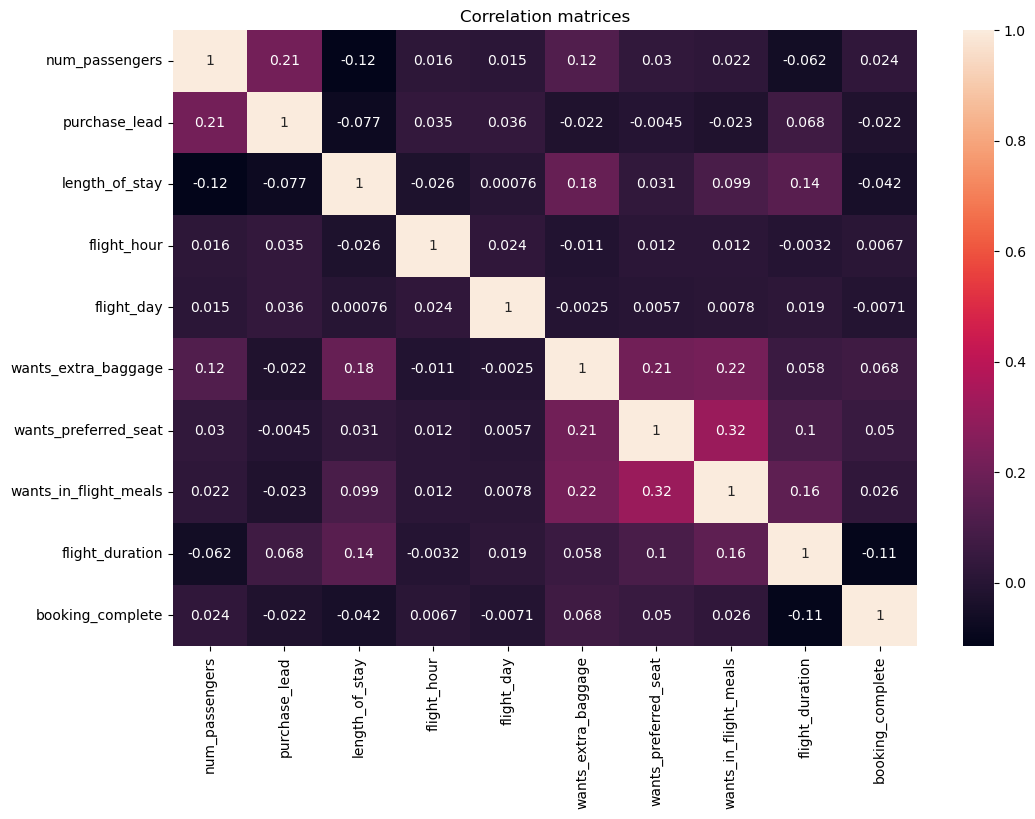

In [30]:
#Heatmap
df_num = df.select_dtypes(exclude='object')
plt.figure(figsize=(12,8))
sb.heatmap(df_num.corr(), annot=True)
plt.title('Correlation matrices')

#### Machine Learning

In [31]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [32]:
X=df[['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
     'length_of_stay', 'flight_hour', 'flight_day','wants_extra_baggage', 'wants_preferred_seat',
     'wants_in_flight_meals', 'flight_duration']]
y=df['booking_complete']

In [33]:
# OneHotEncoding on selected bfeatures
# creating dummy variables for categorical variables
cars_categorical = X.select_dtypes(include=['object'])
cars_categorical.head()


# convert into dummies
cars_dummies = pd.get_dummies(cars_categorical).astype(int)
cars_dummies.head()


# drop categorical variables 
X = X.drop(list(cars_categorical.columns), axis=1)


# concat dummy variables with X
X = pd.concat([X, cars_dummies], axis=1)

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49281 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num_passengers          49281 non-null  int64  
 1   purchase_lead           49281 non-null  int64  
 2   length_of_stay          49281 non-null  int64  
 3   flight_hour             49281 non-null  int64  
 4   flight_day              49281 non-null  int64  
 5   wants_extra_baggage     49281 non-null  int64  
 6   wants_preferred_seat    49281 non-null  int64  
 7   wants_in_flight_meals   49281 non-null  int64  
 8   flight_duration         49281 non-null  float64
 9   sales_channel_Internet  49281 non-null  int32  
 10  sales_channel_Mobile    49281 non-null  int32  
 11  trip_type_CircleTrip    49281 non-null  int32  
 12  trip_type_OneWay        49281 non-null  int32  
 13  trip_type_RoundTrip     49281 non-null  int32  
dtypes: float64(1), int32(5), int64(8)
memory us

In [35]:
'''X=X.values
y=y.values'''

'X=X.values\ny=y.values'

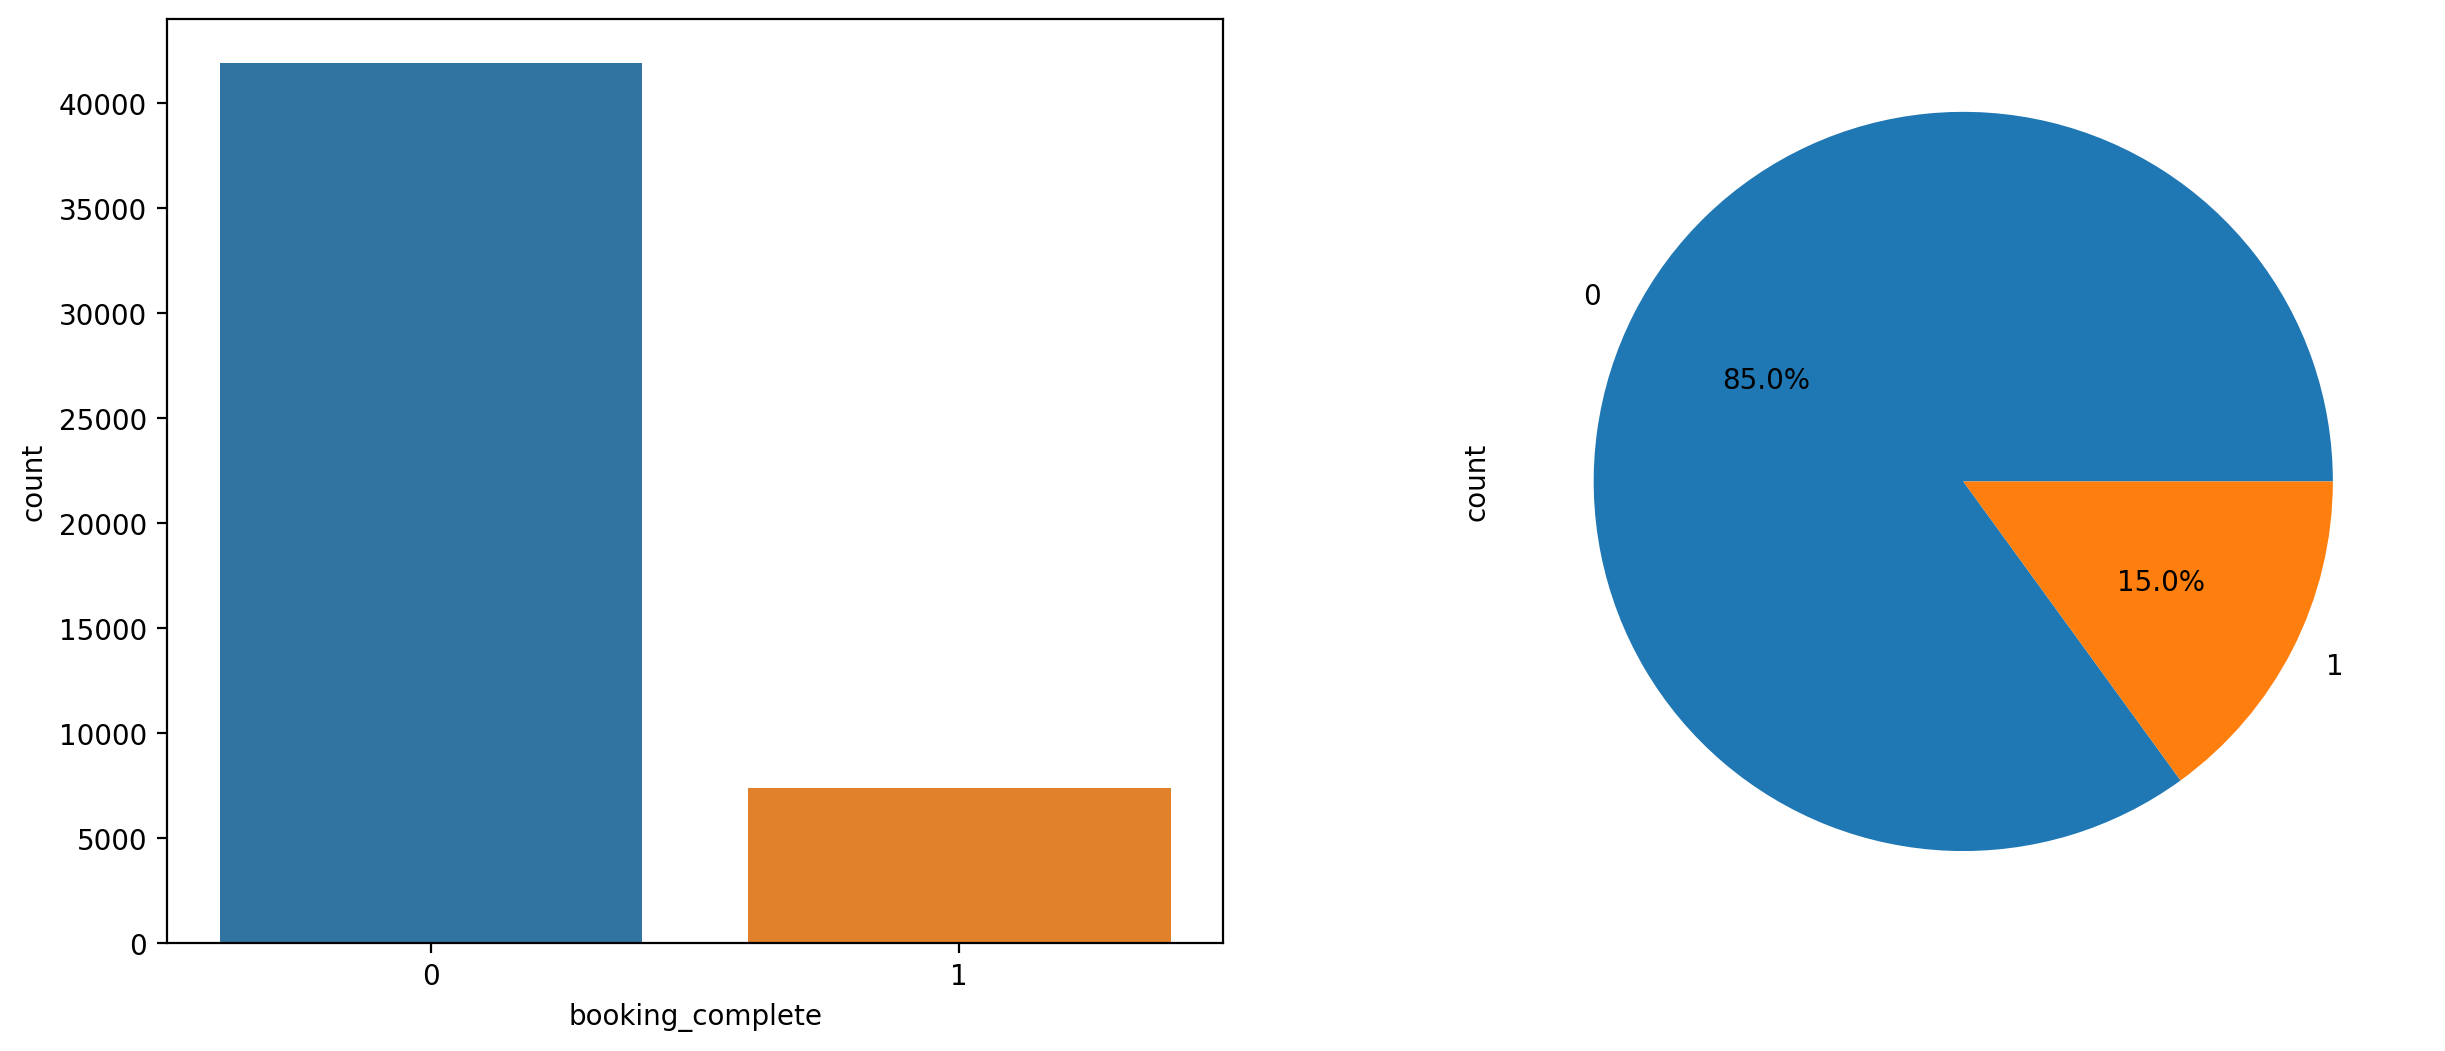

In [36]:
# Create a figure with two subplots
fig, ax_position = plt.subplots(1, 2, figsize=(15, 6), dpi=200)

# Plot a countplot for the 'Rating' column in the filtered dataset on the first subplot
a = sb.countplot(x='booking_complete', data=df, ax=ax_position[0])

# Create a pie chart for the value counts of 'Rating' in the filtered dataset on the second subplot
a = df['booking_complete'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax_position[1])

In [37]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, k_neighbors = 2)

In [38]:
# apply SMOTE to resample the dataset
X_res, y_res = sm.fit_resample(X, y) # The object is applied
X, y = X_res, y_res # reassigning the balanced dataset to X,y

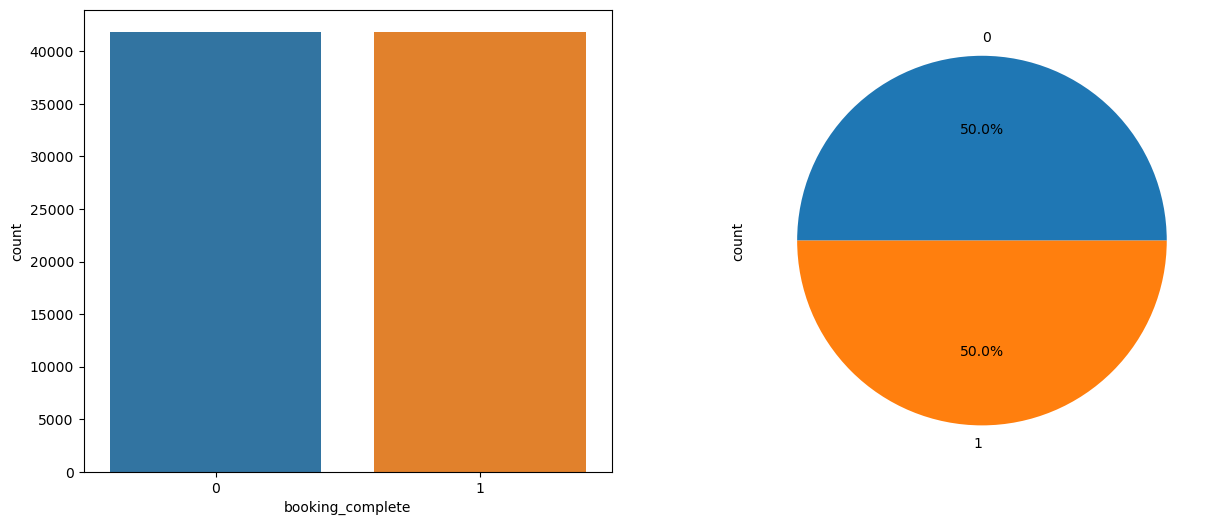

In [39]:
bal_df = pd.concat([X_res,y_res], axis = 1) # creating a dataframe for the balanced dat
fig, ax=plt.subplots(1,2,figsize=(15,6)) # creating the axis shell for subplot
a = sb.countplot(x='booking_complete',data=bal_df, ax=ax[0]) # assigning each of the plot to th
a= bal_df['booking_complete'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [42]:
X_train_sd = scaler.fit_transform(X_train)
X_test_sd = scaler.transform(X_test)

In [43]:
#implementing the standard K-fold
from sklearn.model_selection import KFold

#creat an instance for the kfold
kfold =KFold(n_splits = 5, shuffle = True, random_state = 42)

#creat an instance for the model
gb= GradientBoostingClassifier(random_state=0)

scores= cross_val_score(estimator=gb, X=X_train, y=y_train, cv=kfold)
av_scores =np.mean(scores)
av_scores

0.7969682873979397

In [44]:
#creat an instance for the kfold
kfold =KFold(n_splits = 5, shuffle = True, random_state = 42)

#creat an instance for the model
rf = RandomForestClassifier(random_state=0)

scores= cross_val_score(estimator=rf, X=X_train_sd, y=y_train, cv=kfold)
av_scores =np.mean(scores)
av_scores

0.8777751379085845

In [45]:
#creat an instance for the kfold
kfold =KFold(n_splits = 5, shuffle = True, random_state = 42)

#creat an instance for the model
lr = LogisticRegression(random_state=0)

scores= cross_val_score(estimator=lr, X=X_train_sd, y=y_train, cv=kfold)
av_scores =np.mean(scores)
av_scores

0.6410092373902094

In [46]:
'''grid_param = {
    'penalty' : ['l1','l2'], 
     'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}'''

"grid_param = {\n    'penalty' : ['l1','l2'], \n     'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],\n}"

In [47]:
# import the grid search model and the estimator
from sklearn.model_selection import GridSearchCV
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': list(range(1, 4)),
    'min_samples_leaf': list(range(1, 4))
}

# instantiate the models
rf2 = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf2, param_grid, n_jobs = -1, cv = folds)


# fit the grid search model on the training set
grid.fit(X_train_sd, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 200]})

In [48]:
# get the best parameters
best_params =grid.best_params_
best_params

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 1,
 'n_estimators': 200}

In [49]:
# get the best score

grid.best_score_

0.8776110144766864

In [50]:
rf3 =RandomForestClassifier(**best_params, random_state=42)
rf3.fit(X_train_sd, y_train)

RandomForestClassifier(min_samples_split=1, n_estimators=200, random_state=42)

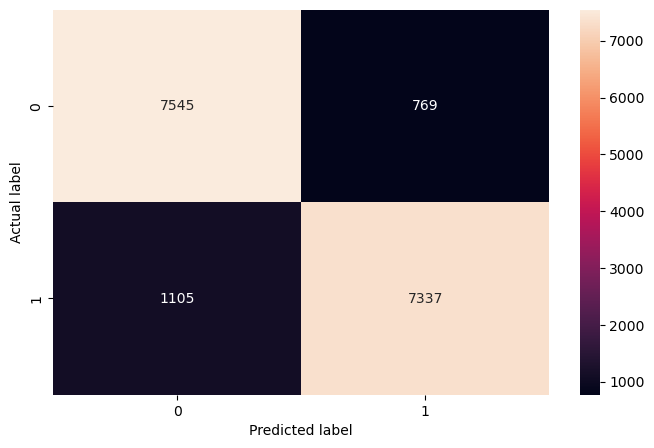

,Accuracy,Recall,Precision,F1-score
0,0.888159,0.888159,0.888819,0.888132


In [52]:
model_performance_classification(rf3, X_test_sd, y_test)

In [53]:
# Function to draw the feature importance diagram
def draw_importance(model, predictors):
    feature_names = predictors.columns.to_list() #get the feature names
    importances = model.feature_importances_ # get the feature importance
    indices = np.argsort(importances) # sort the feature importance
    plt.figure(figsize = (10, 10))
    plt.title("Feature Importances")
    plt.barh(range(len(indices)), importances[indices], color = "violet",
    align = "center")
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel("Relative Importance")
    plt.show()

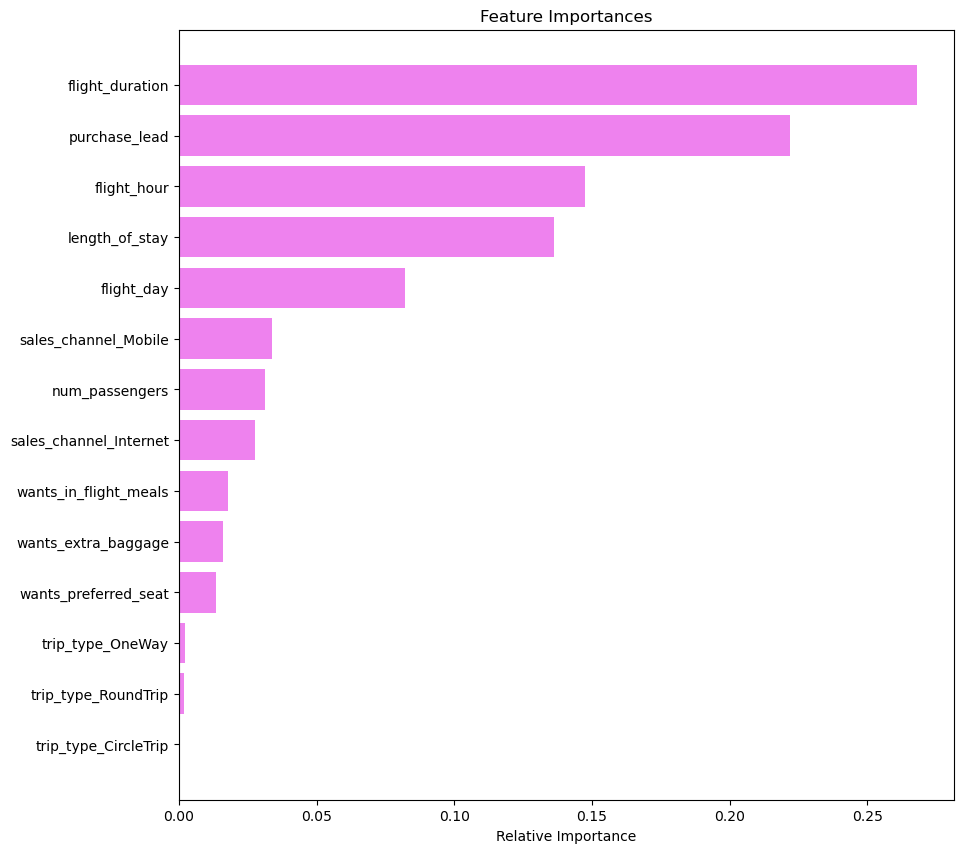

In [55]:
draw_importance(rf3, X_test)